In [1]:
## poisson mixture model


%load_ext autoreload
%autoreload 2

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from general_mm import GeneralizedMixtureModel, ModuledDistribution
import torch
from torch import nn
from torch.distributions import MultivariateNormal
plt.style.use('ggplot')

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

[]

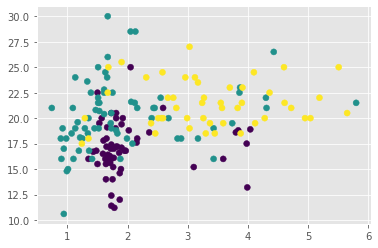

In [36]:
from sklearn.datasets import load_wine

wine = load_wine()
print(wine)


learn_data = torch.tensor(wine.data).to(torch.float32)
plt.scatter(learn_data[:, 1], learn_data[:, 3], c=wine.target)
plt.plot()

In [19]:
from torch.distributions import Poisson, Gamma

cluster_num = 3

parameters = [{"rate": nn.Parameter(torch.rand(1)*3), "concentration": torch.tensor([1.], dtype=torch.float32)}
              for k in range(cluster_num)]
distributions = [ModuledDistribution(Gamma(**parameters[k]),
                                     parameters[k])
                 for k in range(cluster_num)]
model = GeneralizedMixtureModel(distributions, rtol=1e-10)

TypeError: cannot assign 'torch.FloatTensor' object to parameter 'concentration' (torch.nn.Parameter or None required)

In [14]:
predicted = model.fit_predict(learn_data)

ValueError: Expected value argument (Tensor of shape (150, 4)) to be within the support (IntegerGreaterThan(lower_bound=0)) of the distribution Poisson(rate: Parameter containing:
tensor([0.8883], requires_grad=True)), but found invalid values:
tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [4.8000, 3.4000, 1.9000, 0.2000],
        [5.0000, 3.0000, 1.6000, 0.2000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [5.2000, 3.4000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [5.4000, 3.4000, 1.5000, 0.4000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [5.5000, 4.2000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.2000, 1.2000, 0.2000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [5.1000, 3.8000, 1.9000, 0.4000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [4.6000, 3.2000, 1.4000, 0.2000],
        [5.3000, 3.7000, 1.5000, 0.2000],
        [5.0000, 3.3000, 1.4000, 0.2000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 4.9000, 1.5000],
        [5.5000, 2.3000, 4.0000, 1.3000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [6.3000, 3.3000, 4.7000, 1.6000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [6.6000, 2.9000, 4.6000, 1.3000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [5.0000, 2.0000, 3.5000, 1.0000],
        [5.9000, 3.0000, 4.2000, 1.5000],
        [6.0000, 2.2000, 4.0000, 1.0000],
        [6.1000, 2.9000, 4.7000, 1.4000],
        [5.6000, 2.9000, 3.6000, 1.3000],
        [6.7000, 3.1000, 4.4000, 1.4000],
        [5.6000, 3.0000, 4.5000, 1.5000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [5.6000, 2.5000, 3.9000, 1.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.5000, 4.9000, 1.5000],
        [6.1000, 2.8000, 4.7000, 1.2000],
        [6.4000, 2.9000, 4.3000, 1.3000],
        [6.6000, 3.0000, 4.4000, 1.4000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [6.7000, 3.0000, 5.0000, 1.7000],
        [6.0000, 2.9000, 4.5000, 1.5000],
        [5.7000, 2.6000, 3.5000, 1.0000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [6.3000, 2.3000, 4.4000, 1.3000],
        [5.6000, 3.0000, 4.1000, 1.3000],
        [5.5000, 2.5000, 4.0000, 1.3000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [5.8000, 2.6000, 4.0000, 1.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.6000, 2.7000, 4.2000, 1.3000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [5.7000, 2.8000, 4.1000, 1.3000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [7.1000, 3.0000, 5.9000, 2.1000],
        [6.3000, 2.9000, 5.6000, 1.8000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [7.6000, 3.0000, 6.6000, 2.1000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [7.3000, 2.9000, 6.3000, 1.8000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [7.2000, 3.6000, 6.1000, 2.5000],
        [6.5000, 3.2000, 5.1000, 2.0000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [5.7000, 2.5000, 5.0000, 2.0000],
        [5.8000, 2.8000, 5.1000, 2.4000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [6.5000, 3.0000, 5.5000, 1.8000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.6000, 2.8000, 4.9000, 2.0000],
        [7.7000, 2.8000, 6.7000, 2.0000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.7000, 3.3000, 5.7000, 2.1000],
        [7.2000, 3.2000, 6.0000, 1.8000],
        [6.2000, 2.8000, 4.8000, 1.8000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.2000, 3.0000, 5.8000, 1.6000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [7.9000, 3.8000, 6.4000, 2.0000],
        [6.4000, 2.8000, 5.6000, 2.2000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [6.1000, 2.6000, 5.6000, 1.4000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [6.4000, 3.1000, 5.5000, 1.8000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [6.7000, 3.1000, 5.6000, 2.4000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.7000, 3.3000, 5.7000, 2.5000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.2000, 3.4000, 5.4000, 2.3000],
        [5.9000, 3.0000, 5.1000, 1.8000]])

In [ ]:
color = predicted.argmax(dim=0)
print(color)
plt.scatter(learn_data[:, 2], learn_data[:, 3], c=color)
for k in range(cluster_num):
    sample = distributions[k].sample([1000])[:, (2, 3)]
    plt.scatter(sample[:, 0], sample[:, 1], s=1., alpha=0.3)

In [15]:

print(distributions[1].parameter["loc"])

KeyError: 'loc'